In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import os
import random
import skimage.io
import numpy as np
from skimage import img_as_float
from skimage.util import random_noise

ROOT_DIR = os.path.abspath(".")
ORG_IMAGE_DIR = os.path.join(ROOT_DIR, "original_images")
NOI_IMAGE_DIR = os.path.join(ROOT_DIR, "noisy_images")

In [2]:
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = img_as_float(imread(os.path.join(folder,filename)))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames


original_images, original_filenames = load_images_from_folder(ORG_IMAGE_DIR)

print(f"Successfully uploaded {len(original_images)} images from directory {ORG_IMAGE_DIR}")

Successfully uploaded 100 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\original_images


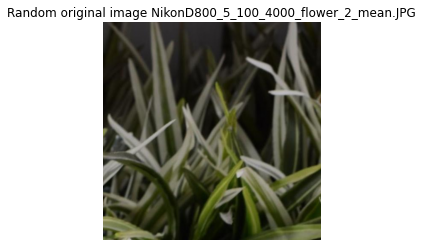

In [3]:
random_org_image = random.choice(original_images)
random_org_filename = None

for file, img in zip(original_filenames, original_images):
    if img is random_org_image:
        random_org_filename = file

#plot_img = 'all'
plot_img = 'one'

if plot_img == 'all':
    for file, img in zip(original_filenames, original_images):
        plt.figure(figsize=(512,512))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Original image {file}')
        plt.show()
else:
    original_image = plt.imshow(random_org_image)
    plt.axis('off')
    plt.title(f'Random original image {random_org_filename}')
    plt.show() 

In [4]:
def add_gaussian_noise(image, sigma):
    noisy = skimage.util.random_noise(image, var=sigma**2) 
    return noisy

In [5]:
def save_noisy_images(filenames, images, output_dir):
    sigma = 0.1
    for file, img in zip(filenames, images):
        noisy = add_gaussian_noise(img, sigma)
        split_file = file.split(".")[0]
        noisy_path = f'{output_dir}/noisy_{split_file}.JPG'
        plt.imsave(noisy_path, noisy)
               
save_noisy_images(original_filenames, original_images, NOI_IMAGE_DIR)

In [6]:
noisy_images, noisy_filenames = load_images_from_folder(NOI_IMAGE_DIR)

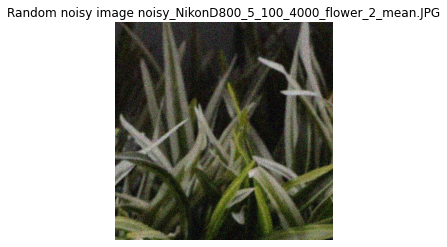

In [7]:
random_noisy_image = None
random_noisy_filename = None

for file, img in zip(noisy_filenames, noisy_images):
    if random_org_filename in file:
        random_noisy_filename = file
        random_noisy_image = img

if plot_img == 'all':
    for file, img in zip(noisy_filenames, noisy_images):
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Noisy image {file}', fontdict=None, loc='center', pad=None)
        plt.show()
else:
    plt.imshow(random_noisy_image)
    plt.axis('off')
    plt.title(f'Random noisy image {random_noisy_filename}', fontdict=None, loc='center', pad=None)
    plt.show() 